# Project: Income Prediction of Individuals Using Machine Learning

## Overview:

In this project I have used machine learning and analysis techinque to predict income of an individaul. This data was extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html donated by  Ronny Kohavi and Barry Becker, Data Mining and Visualization (Email: ronnyk@sgi.com)

Dataset Link: 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

I this project I tried to address three important problems as given below:

* Problem 1:  Prediction task is to determine whether a person makes over 50K a year.

* Problem 2:
Which factors are important for predcition

* Problem 3: Which algorithms are best for this dataset


## Preprocess Datasets:

In this step I have first all the loaded datasets given in adult.data.csv which is used for training purpose. I also loaded adult.test.csv which is used for training/validation purpose.







In [171]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

In [172]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1500)

In [173]:
# load adult.data.csv into application_train_data dataframe
application_train_data = pd.read_csv('adult.data.csv', header=None)
print('Training data shape:',application_train_data.shape)

Training data shape: (32561, 15)


In [174]:
application_train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [175]:
column_list = ['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATION_NUM', 'MARITAL_STATUS','OCCUPATION','RELATIONSHIP','RACE','SEX','CAPITAL_GAIN','CAPITAL_LOSS','HOURS_PER_WEEK','NATIVE_COUNTRY','TARGET']
application_train_data.columns = column_list
application_train_data['TARGET'] = application_train_data['TARGET'].apply(lambda x: 1 if x.strip() =='>50K' else 0)

In [176]:
application_train_data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,TARGET
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [177]:
# load adult.test.csv into application_test_data dataframe
application_test_data = pd.read_csv('adult.test.csv', header=None)
print('Test data shape:',application_test_data.shape)

Test data shape: (16281, 15)


In [178]:
application_test_data.columns = column_list
application_test_data['TARGET'] = application_test_data['TARGET'].apply(lambda x: 1 if x.strip() =='>50K' else 0)

In [179]:
application_test_data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,TARGET
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


## Missing Data Analysis

In this step, we first get which all columns have missing values and then calculate percentage of records which have missing values in each column.



In [180]:
application_train_data.isnull().any()

AGE               False
WORKCLASS         False
FNLWGT            False
EDUCATION         False
EDUCATION_NUM     False
MARITAL_STATUS    False
OCCUPATION        False
RELATIONSHIP      False
RACE              False
SEX               False
CAPITAL_GAIN      False
CAPITAL_LOSS      False
HOURS_PER_WEEK    False
NATIVE_COUNTRY    False
TARGET            False
dtype: bool

In [181]:
application_test_data.isnull().any()

AGE               False
WORKCLASS         False
FNLWGT            False
EDUCATION         False
EDUCATION_NUM     False
MARITAL_STATUS    False
OCCUPATION        False
RELATIONSHIP      False
RACE              False
SEX               False
CAPITAL_GAIN      False
CAPITAL_LOSS      False
HOURS_PER_WEEK    False
NATIVE_COUNTRY    False
TARGET            False
dtype: bool

## Interpretation
As there are no missing value columns, we can skip this

## Analyze the data

## Get statistical parameters of the training and test data

In [14]:
application_train_data.describe()

,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,TARGET
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [15]:
application_test_data.describe()

,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,TARGET
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.0
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236,0.0
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332,0.0
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.0
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000,0.0
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000,0.0
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000,0.0
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000,0.0


## Interpretation: 
From the statistics parameters, mean of fnlwght is very high value 1.894357e+05, so we need log transformation


## Get the event rate

Event rate percentage is calculated by dividing number of 1 in INCOME field by total number of records multiplied by 100

In [16]:
event_rate = (sum(application_train_data.loc[application_train_data['TARGET']==1,'TARGET'] )/application_train_data.shape[0])*100
print("Event_Rate: " + str(event_rate) + "%")

Event_Rate: 24.080955744602438%


## Interpretation:
From the Event Rate, it is clear that target income is imbalanced, hence we need to consider recall, precision in addition to accuracy

## Analyze WORKCLASS vs TARGET

* Create count of each type of WORKCLASS
* Create a cross-tabulation bar plot between WORKCLASS vs TARGET

In [17]:
application_train_data['WORKCLASS'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WORKCLASS, dtype: int64

                      No   Yes    Percent
WORKCLASS                                
 ?                  1645   191  10.403050
 Federal-gov         589   371  38.645833
 Local-gov          1476   617  29.479216
 Never-worked          7     0   0.000000
 Private           17733  4963  21.867289
 Self-emp-inc        494   622  55.734767
 Self-emp-not-inc   1817   724  28.492719
 State-gov           945   353  27.195686
 Without-pay          14     0   0.000000


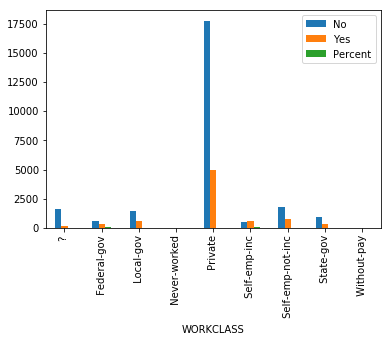

In [18]:
tab = pd.crosstab(index=application_train_data['WORKCLASS'],columns=application_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

## Interpretation:
In terms of absolute numbers Private workclass have most number of people (4963) having > 50K income. However, percentage wise 21 percent of total private employees have mre tahn 50K income

% of Yes of Private employed 21.86% dividing by event rate, lift value = 21.86/24.08 = 0.91

% of Yes Self-emp-inc  is 55.73 divinding by event rate, lift value = 55.73/24.08 = 2.31

% of Yes of Federal-gov is 38.65, dividing by event rate, lift value = 38.65/24.08 = 1.60

% of Yes of Local-gov  is 29.48 dividing by event rate, lift value =29.48/24.08= 1.22

From the lift values, workcalss could be significant



## Analyze EDUCATION vs TARGET

Create count of each type of EDUCATION
Create a cross-tabulation bar plot between WORKCLASS vs TARGET

                 No   Yes    Percent
EDUCATION                           
 10th           871    62   6.645230
 11th          1115    60   5.106383
 12th           400    33   7.621247
 1st-4th        162     6   3.571429
 5th-6th        317    16   4.804805
 7th-8th        606    40   6.191950
 9th            487    27   5.252918
 Assoc-acdm     802   265  24.835989
 Assoc-voc     1021   361  26.121563
 Bachelors     3134  2221  41.475257
 Doctorate      107   306  74.092010
 HS-grad       8826  1675  15.950862
 Masters        764   959  55.658735
 Preschool       51     0   0.000000
 Prof-school    153   423  73.437500
 Some-college  5904  1387  19.023454


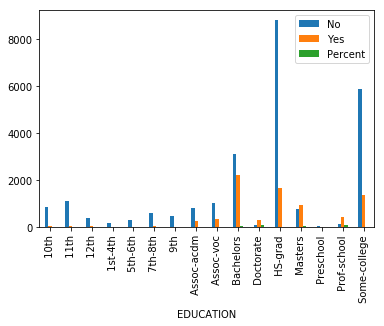

In [19]:
tab = pd.crosstab(index=application_train_data['EDUCATION'],columns=application_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

## Interpretation

In terms of absoulute numbers bachelors degree have highest number of persons having > 50K income. In terms of percentage, doctorates have
highest percentage of people having > 50K

% of Yes of Doctorate 74.09 dividing by event rate, lift value = 74.09/24.08 = 3.07

% of Yes Masters  is 55.65 divinding by event rate, lift value = 55.65/24.08 = 2.31

% of Yes of Bachelors is 41.48, dividing by event rate, lift value = 41.48/24.08 = 1.72

% of Yes of HS-grad  is 15.95 dividing by event rate, lift value = 15.95/24.08= 0.66

From the lift values, education could be significant



## Analyze MARITAL_STATUS vs TARGET

Create count of each type of  MARITAL_STATUS Create a cross-tabulation bar plot between MARITAL_STATUS vs TARGET

                           No   Yes    Percent
MARITAL_STATUS                                
 Divorced                3980   463  10.420887
 Married-AF-spouse         13    10  43.478261
 Married-civ-spouse      8284  6692  44.684829
 Married-spouse-absent    384    34   8.133971
 Never-married          10192   491   4.596087
 Separated                959    66   6.439024
 Widowed                  908    85   8.559919


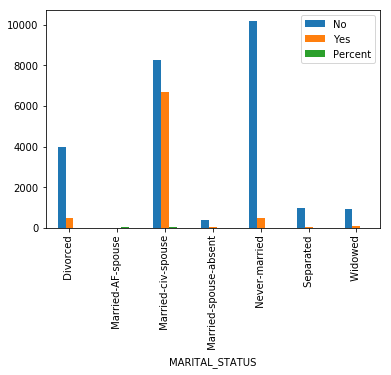

In [20]:
tab = pd.crosstab(index=application_train_data['MARITAL_STATUS'],columns=application_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

Interpretation:

% of Yes of Married-civ-spouse 44.68 dividing by event rate, lift value = 44.68/24.08 = 1.86
% of Yes of Never-married 4.60 dividing by event rate, lift value = 4.60/24.08 = 0.19
% of Yes of Divorced 10.42 dividing by event rate, lift value = 10.42/24.08 = 0.43

From the lift values MARITAL_STATUS is a significant feature in determining person having income > 50K


## Linear correlation analysis of fields:


TARGET, CAPITAL_GAIN, CAPITAL_LOSS, HOURS_PER_WEEK

* First calculate correlation coefficinets
* Draw the heatmap



Correlation coefficients are:
                  TARGET  CAPITAL_GAIN  CAPITAL_LOSS  HOURS_PER_WEEK
TARGET          1.000000      0.223329      0.150526        0.229689
CAPITAL_GAIN    0.223329      1.000000     -0.031615        0.078409
CAPITAL_LOSS    0.150526     -0.031615      1.000000        0.054256
HOURS_PER_WEEK  0.229689      0.078409      0.054256        1.000000


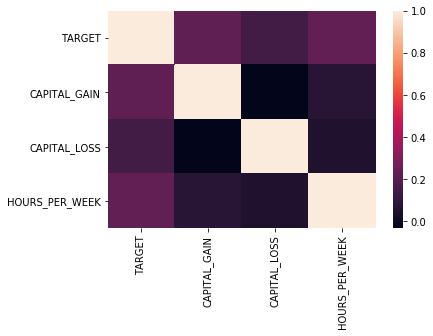

In [21]:
cor = application_train_data[['TARGET','CAPITAL_GAIN','CAPITAL_LOSS','HOURS_PER_WEEK']].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)

## Interpretation: 

As all the correlation coefficients are low value, the fields TARGET, CAPITAL_GAIN, CAPITAL_LOSS, HOURS_PER_WEEK do not have
correlation

## Linear correlation analysis of fields:


TARGET, AGE, FNLWGT, EDUCATION_NUM

* First calculate correlation coefficinets
* Draw the heatmap


Correlation coefficients are:
                 TARGET       AGE    FNLWGT  EDUCATION_NUM
TARGET         1.000000  0.234037 -0.009463       0.335154
AGE            0.234037  1.000000 -0.076646       0.036527
FNLWGT        -0.009463 -0.076646  1.000000      -0.043195
EDUCATION_NUM  0.335154  0.036527 -0.043195       1.000000


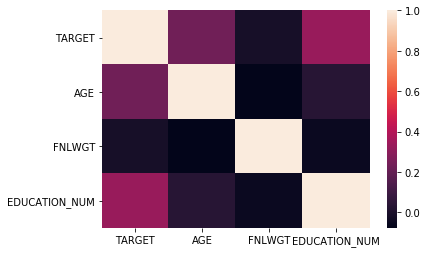

In [22]:
cor = application_train_data[['TARGET','AGE','FNLWGT','EDUCATION_NUM']].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)

## Interpretation: 
From the heatmap it is clear that EDUCATION_NUM there is some corrrelation to TARGET

## Field Transformations

i. Logarithmic Transformation: For highly-skewed feature distributions such as FNLWGT, CAPITAL_GAIN  CAPITAL_LOSS, logarithmic transformation is done on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

ii. Normalizing Numerical Features

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as  EDUCATION_NUM, AGE above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

iii.One hot encoding for categorical features Categorical variables having more than two possible vlaues are encoded using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. For example, assume someFeature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.

iv. Label Encoding: Categorical variables having more than two possible are encoded using Label Encode to have values 0 and 1

In [182]:
# Perform log transformation
log_transform_fields = [ 'FNLWGT', 'CAPITAL_GAIN', 'CAPITAL_LOSS']

train_data = pd.DataFrame(data = application_train_data)
train_data[log_transform_fields] = application_train_data[log_transform_fields].apply(lambda x: np.log(x + 1))

test_data = pd.DataFrame(data = application_test_data)
test_data[log_transform_fields] = application_test_data[log_transform_fields].apply(lambda x: np.log(x + 1))

In [183]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

numerical = ['AGE','FNLWGT','EDUCATION_NUM', 'CAPITAL_GAIN', 'CAPITAL_LOSS']

temp1 = pd.DataFrame(data = train_data)
temp1[numerical] = scaler.fit_transform( train_data[numerical])
train_data = temp1

temp2 = pd.DataFrame(data = test_data)
temp2[numerical] = scaler.fit_transform( test_data[numerical])
test_data = temp2

In [184]:
train_data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,TARGET
0,0.301370,State-gov,0.384197,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,40,United-States,0
1,0.452055,Self-emp-not-inc,0.399234,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,0
2,0.287671,Private,0.597596,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,0
3,0.493151,Private,0.615275,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,0
4,0.150685,Private,0.691582,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,0


In [26]:
import statsmodels.api as sm
import scipy.stats
from patsy import dmatrices



# create dataframes with an intercept column and dummy variables for
# WORKCLASS, MARITAL_STATUS,  OCCUPATION, RELATIONSHIP, RACE, SEX, NATIVE_COUNTRY
Y, X = dmatrices('TARGET ~ AGE + C(WORKCLASS) + FNLWGT +  C(EDUCATION) \
                  + EDUCATION_NUM + C(MARITAL_STATUS) + C(OCCUPATION) + C(RELATIONSHIP) \
                  + C(RACE) + C(SEX) + CAPITAL_GAIN + CAPITAL_LOSS + HOURS_PER_WEEK + C(NATIVE_COUNTRY)',
                  train_data, return_type="dataframe")
X.columns

Index(['Intercept', 'C(WORKCLASS)[T. Federal-gov]', 'C(WORKCLASS)[T. Local-gov]', 'C(WORKCLASS)[T. Never-worked]', 'C(WORKCLASS)[T. Private]', 'C(WORKCLASS)[T. Self-emp-inc]', 'C(WORKCLASS)[T. Self-emp-not-inc]', 'C(WORKCLASS)[T. State-gov]', 'C(WORKCLASS)[T. Without-pay]', 'C(EDUCATION)[T. 11th]',
       ...
       'C(NATIVE_COUNTRY)[T. Trinadad&Tobago]', 'C(NATIVE_COUNTRY)[T. United-States]', 'C(NATIVE_COUNTRY)[T. Vietnam]', 'C(NATIVE_COUNTRY)[T. Yugoslavia]', 'AGE', 'FNLWGT', 'EDUCATION_NUM', 'CAPITAL_GAIN', 'CAPITAL_LOSS', 'HOURS_PER_WEEK'], dtype='object', length=101)

In [27]:
X = X.rename(columns = {
'C(WORKCLASS)[T. Federal-gov]':'WORKCLASS_Federal_gov',
'C(WORKCLASS)[T. Local-gov]' : 'WORKCLASS_Local_gov',      
'C(WORKCLASS)[T. Never-worked]' : 'WORKCLASS_Never_worked',
'C(WORKCLASS)[T. Private]' :  'WORKCLASS_Private',  
'C(WORKCLASS)[T. Self-emp-inc]' : 'WORKCLASS_Self_emp_inc',     
'C(WORKCLASS)[T. Self-emp-not-inc]' : 'WORKCLASS_Self_emp_not_inc',       
'C(WORKCLASS)[T. State-gov]' :    'WORKCLASS_State_gov',                       
'C(WORKCLASS)[T. Without-pay]' :  'WORKCLASS_Without_pay',                    
'C(EDUCATION)[T. 11th]' :  'EDUCATION_11th',                          
'C(EDUCATION)[T. 12th]' :   'EDUCATION_12th',                            
'C(EDUCATION)[T. 1st-4th]' : 'EDUCATION_1st_4th',                           
'C(EDUCATION)[T. 5th-6th]' : 'EDUCATION_5th_6th',                             
'C(EDUCATION)[T. 7th-8th]' : 'EDUCATION_7th_8th',                          
'C(EDUCATION)[T. 9th]' :     'EDUCATION_9th',                           
'C(EDUCATION)[T. Assoc-acdm]' : 'EDUCATION_Assoc_acdm',                         
'C(EDUCATION)[T. Assoc-voc]' :   'EDUCATION_voc',                        
'C(EDUCATION)[T. Bachelors]' :   'EDUCATION_Bachelors',                        
'C(EDUCATION)[T. Doctorate]' :   'EDUCATION_Doctorate',                        
'C(EDUCATION)[T. HS-grad]' :     'EDUCATION_HS_grad',                       
'C(EDUCATION)[T. Masters]' :     'EDUCATION_Masters',                       
'C(EDUCATION)[T. Preschool]' :   'EDUCATION_Preschool',                      
'C(EDUCATION)[T. Prof-school]' : 'EDUCATION_Prof_school',                         
'C(EDUCATION)[T. Some-college]' : 'EDUCATION_Some_college',                       
'C(MARITAL_STATUS)[T. Married-AF-spouse]' : 'MARITAL_STATUS_Married_AF_spouse',             
'C(MARITAL_STATUS)[T. Married-civ-spouse]' : 'MARITAL_STATUS_Married_civ_spouse',              
'C(MARITAL_STATUS)[T. Married-spouse-absent]' : 'MARITAL_STATUS_spouse_absent',         
'C(MARITAL_STATUS)[T. Never-married]' :  'MARITAL_STATUS_Never_married',                 
'C(MARITAL_STATUS)[T. Separated]' :   'MARITAL_STATUS_Separated',                 
'C(MARITAL_STATUS)[T. Widowed]' :      'MARITAL_ Widowed',                   
'C(OCCUPATION)[T. Adm-clerical]' :     'OCCUPATION_Adm_clerical',                
'C(OCCUPATION)[T. Armed-Forces]' :     'OCCUPATION_Armed-Forces',                 
'C(OCCUPATION)[T. Craft-repair]' :     'OCCUPATION_Craft_repair',                
'C(OCCUPATION)[T. Exec-managerial]' :  'OCCUPATION_ Exec_managerial',                  
'C(OCCUPATION)[T. Farming-fishing]' :  'OCCUPATION_Farming_fishing',                 
'C(OCCUPATION)[T. Handlers-cleaners]' : 'OCCUPATION_Handlers_cleaners',                
'C(OCCUPATION)[T. Machine-op-inspct]' : 'OCCUPATION_Machine_op_inspct',                
'C(OCCUPATION)[T. Other-service]' :   'OCCUPATION_Other_service',                  
'C(OCCUPATION)[T. Priv-house-serv]' :  'OCCUPATION_Priv_house_serv',                 
'C(OCCUPATION)[T. Prof-specialty]' :   'OCCUPATION_Prof_specialty',                 
'C(OCCUPATION)[T. Protective-serv]' :   'OCCUPATION_Protective_serv',                
'C(OCCUPATION)[T. Sales]' :           'OCCUPATION_Sales',                 
'C(OCCUPATION)[T. Tech-support]' :     'OCCUPATION_Tech_support',                
'C(OCCUPATION)[T. Transport-moving]' :  'OCCUPATION_Transport_moving',                
'C(RELATIONSHIP)[T. Not-in-family]' :  'RELATIONSHIP_Not_in_family',                   
'C(RELATIONSHIP)[T. Other-relative]' :  'RELATIONSHIP_Other_relative',                
'C(RELATIONSHIP)[T. Own-child]' :  'RELATIONSHIP_Own_child',                     
'C(RELATIONSHIP)[T. Unmarried]' :   'RELATIONSHIP_Unmarried',                     
'C(RELATIONSHIP)[T. Wife]' :    'RELATIONSHIP_Wife',                         
'C(RACE)[T. Asian-Pac-Islander]' : 'RACE_Asian_Pac_Islander',                      
'C(RACE)[T. Black]' :   'RACE_Black',                                 
'C(RACE)[T. Other]' :   'RACE_Other',                                    
'C(RACE)[T. White]' :   'RACE_White',                                 
'C(SEX)[T. Male]' :     'SEX_Male',                                 
'C(NATIVE_COUNTRY)[T. Cambodia]' :  'NATIVE_COUNTRY_Cambodia',                     
'C(NATIVE_COUNTRY)[T. Canada]' :   'NATIVE_COUNTRY_Canada',                       
'C(NATIVE_COUNTRY)[T. China]' :   'NATIVE_COUNTRY_China',                       
'C(NATIVE_COUNTRY)[T. Columbia]' : 'NATIVE_COUNTRY_Columbia',                      
'C(NATIVE_COUNTRY)[T. Cuba]' :     'NATIVE_COUNTRY_Cuba',                       
'C(NATIVE_COUNTRY)[T. Dominican-Republic]' :  'NATIVE_COUNTRY_Dominican_Republic',           
'C(NATIVE_COUNTRY)[T. Ecuador]' :   'NATIVE_COUNTRY_Ecuador',                     
'C(NATIVE_COUNTRY)[T. El-Salvador]' :  'NATIVE_COUNTRY_El-Salvador',                  
'C(NATIVE_COUNTRY)[T. England]' :  'NATIVE_COUNTRY_England',                       
'C(NATIVE_COUNTRY)[T. France]' :   'NATIVE_COUNTRY_France',                       
'C(NATIVE_COUNTRY)[T. Germany]' :   'NATIVE_COUNTRY_Germany',                      
'C(NATIVE_COUNTRY)[T. Greece]' :    'NATIVE_COUNTRY_Greece',                     
'C(NATIVE_COUNTRY)[T. Guatemala]' :  'NATIVE_COUNTRY_Guatemala',                    
'C(NATIVE_COUNTRY)[T. Haiti]' :       'NATIVE_COUNTRY_Haiti',                    
'C(NATIVE_COUNTRY)[T. Holand-Netherlands]' :  'NATIVE_COUNTRY_Holand-Netherlands',          
'C(NATIVE_COUNTRY)[T. Honduras]' :   'NATIVE_COUNTRY_Honduras',                    
'C(NATIVE_COUNTRY)[T. Hong]' :    'NATIVE_COUNTRY_Hong',                        
'C(NATIVE_COUNTRY)[T. Hungary]' :  'NATIVE_COUNTRY_Hungary',                      
'C(NATIVE_COUNTRY)[T. India]' :   'NATIVE_COUNTRY_India',                       
'C(NATIVE_COUNTRY)[T. Iran]' :     'NATIVE_COUNTRY_Iran',                       
'C(NATIVE_COUNTRY)[T. Ireland]' :  'NATIVE_COUNTRY_Ireland',                       
'C(NATIVE_COUNTRY)[T. Italy]' :   'NATIVE_COUNTRY_Italy',                        
'C(NATIVE_COUNTRY)[T. Jamaica]' :  'NATIVE_COUNTRY_Jamaica',                       
'C(NATIVE_COUNTRY)[T. Japan]' :   'NATIVE_COUNTRY_Japan',                        
'C(NATIVE_COUNTRY)[T. Laos]' :    'NATIVE_COUNTRY_Laos',                       
'C(NATIVE_COUNTRY)[T. Mexico]' :   'NATIVE_COUNTRY_Mexico',                      
'C(NATIVE_COUNTRY)[T. Nicaragua]' : 'NATIVE_COUNTRY_Nicaragua',                     
'C(NATIVE_COUNTRY)[T. Outlying-US(Guam-USVI-etc)]' : 'NATIVE_COUNTRY_Outlying-US_Guam_USVI_etc',    
'C(NATIVE_COUNTRY)[T. Peru]' :   'NATIVE_COUNTRY_Peru',                        
'C(NATIVE_COUNTRY)[T. Philippines]' : 'NATIVE_COUNTRY_Philippines',                    
'C(NATIVE_COUNTRY)[T. Poland]' :    'NATIVE_COUNTRY_Poland',                      
'C(NATIVE_COUNTRY)[T. Portugal]' :   'NATIVE_COUNTRY_Portugal',                     
'C(NATIVE_COUNTRY)[T. Puerto-Rico]' : 'NATIVE_COUNTRY_Puerto_Rico',                   
'C(NATIVE_COUNTRY)[T. Scotland]' : 'NATIVE_COUNTRY_Scotland',                       
'C(NATIVE_COUNTRY)[T. South]' :  'NATIVE_COUNTRY_South',                        
'C(NATIVE_COUNTRY)[T. Taiwan]' :  'NATIVE_COUNTRY_Taiwan',                        
'C(NATIVE_COUNTRY)[T. Thailand]' :     'NATIVE_COUNTRY_Thailand',                  
'C(NATIVE_COUNTRY)[T. Trinadad&Tobago]' :  'NATIVE_COUNTRY_Trinadad_Tobago',              
'C(NATIVE_COUNTRY)[T. United-States]' :   'NATIVE_COUNTRY_United_States',                
'C(NATIVE_COUNTRY)[T. Vietnam]' :     'NATIVE_COUNTRY_Vietnam',                   
'C(NATIVE_COUNTRY)[T. Yugoslavia]' :   'NATIVE_COUNTRY_Yugoslavia'
})

In [28]:
X.head()

,Intercept,WORKCLASS_Federal_gov,WORKCLASS_Local_gov,WORKCLASS_Never_worked,WORKCLASS_Private,WORKCLASS_Self_emp_inc,WORKCLASS_Self_emp_not_inc,WORKCLASS_State_gov,WORKCLASS_Without_pay,EDUCATION_11th,EDUCATION_12th,EDUCATION_1st_4th,EDUCATION_5th_6th,EDUCATION_7th_8th,EDUCATION_9th,EDUCATION_Assoc_acdm,EDUCATION_voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS_grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof_school,EDUCATION_Some_college,MARITAL_STATUS_Married_AF_spouse,MARITAL_STATUS_Married_civ_spouse,MARITAL_STATUS_spouse_absent,MARITAL_STATUS_Never_married,MARITAL_STATUS_Separated,MARITAL_ Widowed,OCCUPATION_Adm_clerical,OCCUPATION_Armed-Forces,OCCUPATION_Craft_repair,OCCUPATION_ Exec_managerial,OCCUPATION_Farming_fishing,OCCUPATION_Handlers_cleaners,OCCUPATION_Machine_op_inspct,OCCUPATION_Other_service,OCCUPATION_Priv_house_serv,OCCUPATION_Prof_specialty,OCCUPATION_Protective_serv,OCCUPATION_Sales,OCCUPATION_Tech_support,OCCUPATION_Transport_moving,RELATIONSHIP_Not_in_family,RELATIONSHIP_Other_relative,RELATIONSHIP_Own_child,RELATIONSHIP_Unmarried,RELATIONSHIP_Wife,RACE_Asian_Pac_Islander,RACE_Black,RACE_Other,RACE_White,SEX_Male,NATIVE_COUNTRY_Cambodia,NATIVE_COUNTRY_Canada,NATIVE_COUNTRY_China,NATIVE_COUNTRY_Columbia,NATIVE_COUNTRY_Cuba,NATIVE_COUNTRY_Dominican_Republic,NATIVE_COUNTRY_Ecuador,NATIVE_COUNTRY_El-Salvador,NATIVE_COUNTRY_England,NATIVE_COUNTRY_France,NATIVE_COUNTRY_Germany,NATIVE_COUNTRY_Greece,NATIVE_COUNTRY_Guatemala,NATIVE_COUNTRY_Haiti,NATIVE_COUNTRY_Holand-Netherlands,NATIVE_COUNTRY_Honduras,NATIVE_COUNTRY_Hong,NATIVE_COUNTRY_Hungary,NATIVE_COUNTRY_India,NATIVE_COUNTRY_Iran,NATIVE_COUNTRY_Ireland,NATIVE_COUNTRY_Italy,NATIVE_COUNTRY_Jamaica,NATIVE_COUNTRY_Japan,NATIVE_COUNTRY_Laos,NATIVE_COUNTRY_Mexico,NATIVE_COUNTRY_Nicaragua,NATIVE_COUNTRY_Outlying-US_Guam_USVI_etc,NATIVE_COUNTRY_Peru,NATIVE_COUNTRY_Philippines,NATIVE_COUNTRY_Poland,NATIVE_COUNTRY_Portugal,NATIVE_COUNTRY_Puerto_Rico,NATIVE_COUNTRY_Scotland,NATIVE_COUNTRY_South,NATIVE_COUNTRY_Taiwan,NATIVE_COUNTRY_Thailand,NATIVE_COUNTRY_Trinadad_Tobago,NATIVE_COUNTRY_United_States,NATIVE_COUNTRY_Vietnam,NATIVE_COUNTRY_Yugoslavia,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.301370,0.384197,0.800000,0.667492,0.0,40.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.452055,0.399234,0.800000,0.000000,0.0,13.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287671,0.597596,0.533333,0.000000,0.0,40.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.493151,0.615275,0.400000,0.000000,0.0,40.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [29]:
Y

,TARGET
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,1.0
8,1.0
9,1.0


In [30]:
# flatten y into a 1-D array
y = np.ravel(Y)

In [31]:
import statsmodels.discrete.discrete_model as sm

In [32]:
logit = sm.Logit(y, X)
logit.fit().params

         Current function value: 0.327679
         Iterations: 35


E:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Intercept                                   -9.595447
WORKCLASS_Federal_gov                        1.865412
WORKCLASS_Local_gov                          1.170437
WORKCLASS_Never_worked                      -4.355701
WORKCLASS_Private                            1.374251
WORKCLASS_Self_emp_inc                       1.579517
WORKCLASS_Self_emp_not_inc                   0.909755
WORKCLASS_State_gov                          1.049001
WORKCLASS_Without_pay                      -21.355073
EDUCATION_11th                              -0.117762
EDUCATION_12th                               0.093894
EDUCATION_1st_4th                            0.300387
EDUCATION_5th_6th                            0.365038
EDUCATION_7th_8th                           -0.160913
EDUCATION_9th                               -0.058430
EDUCATION_Assoc_acdm                         0.095845
EDUCATION_voc                                0.314577
EDUCATION_Bachelors                          0.501487
EDUCATION_Doctorate         

In [33]:
result_ = logit.fit()

         Current function value: 0.327679
         Iterations: 35


E:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [34]:
print(result_.summary2())

                                               Results: Logit
Model:                              Logit                          No. Iterations:                 35.0000   
Dependent Variable:                 y                              Pseudo R-squared:               0.406     
Date:                               2018-11-15 23:43               AIC:                            21537.1120
No. Observations:                   32561                          BIC:                            22367.8082
Df Model:                           98                             Log-Likelihood:                 -10670.   
Df Residuals:                       32462                          LL-Null:                        -17974.   
Converged:                          0.0000                         Scale:                          1.0000    
-------------------------------------------------------------------------------------------------------------
                                          Coef.      Std.E

E:\anaconda\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [35]:
accuracy_score(y,np.where(result_.predict(X)>0.5,1,0))

0.84730198703971

In [36]:
print(Y)

       TARGET
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        0.0
13        0.0
14        1.0
15        0.0
16        0.0
17        0.0
18        0.0
19        1.0
20        1.0
21        0.0
22        0.0
23        0.0
24        0.0
25        1.0
26        0.0
27        1.0
28        0.0
29        0.0
30        0.0
31        0.0
32        0.0
33        0.0
34        0.0
35        0.0
36        0.0
37        0.0
38        1.0
39        0.0
40        0.0
41        0.0
42        0.0
43        0.0
44        0.0
45        1.0
46        0.0
47        0.0
48        0.0
49        0.0
50        0.0
51        0.0
52        1.0
53        1.0
54        0.0
55        1.0
56        0.0
57        0.0
58        0.0
59        0.0
60        0.0
61        0.0
62        0.0
63        1.0
64        0.0
65        0.0
66        0.0
67        1.0
68        1.0
69        0.0
70    

In [37]:
pd.merge(X,Y, left_index=True, right_index=True)[['TARGET']]

,TARGET
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,1.0
8,1.0
9,1.0


In [38]:
X_Y_combined = pd.merge(X,Y, left_index=True, right_index=True)
Y_reduced1, X_reduced1 = dmatrices('TARGET ~ MARITAL_STATUS_Married_AF_spouse + MARITAL_STATUS_Married_civ_spouse \
                  + MARITAL_STATUS_Never_married + RELATIONSHIP_Own_child + RELATIONSHIP_Wife + SEX_Male \
                  + NATIVE_COUNTRY_Italy + NATIVE_COUNTRY_United_States + AGE + FNLWGT+ CAPITAL_GAIN \
                  + CAPITAL_LOSS + HOURS_PER_WEEK',
                  X_Y_combined, return_type="dataframe")
X_reduced1.columns

Index(['Intercept', 'MARITAL_STATUS_Married_AF_spouse', 'MARITAL_STATUS_Married_civ_spouse', 'MARITAL_STATUS_Never_married', 'RELATIONSHIP_Own_child', 'RELATIONSHIP_Wife', 'SEX_Male', 'NATIVE_COUNTRY_Italy', 'NATIVE_COUNTRY_United_States', 'AGE', 'FNLWGT', 'CAPITAL_GAIN', 'CAPITAL_LOSS', 'HOURS_PER_WEEK'], dtype='object')

In [39]:
y_reduced1 = np.ravel(Y_reduced1)

In [40]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_reduced1, y_reduced1)

# check the accuracy on the training set
model.score(X_reduced1, y_reduced1)

0.7985319861183625

In [41]:
logit = sm.Logit(y_reduced1, X_reduced1)
logit.fit().params

Optimization terminated successfully.
         Current function value: 0.388834
         Iterations 8


Intercept                           -5.590698
MARITAL_STATUS_Married_AF_spouse     1.815648
MARITAL_STATUS_Married_civ_spouse    1.575228
MARITAL_STATUS_Never_married        -0.208485
RELATIONSHIP_Own_child              -1.486424
RELATIONSHIP_Wife                    1.178586
SEX_Male                             0.704855
NATIVE_COUNTRY_Italy                 0.407299
NATIVE_COUNTRY_United_States         0.376234
AGE                                  1.609788
FNLWGT                               0.514097
CAPITAL_GAIN                         2.492197
CAPITAL_LOSS                         1.480956
HOURS_PER_WEEK                       0.036048
dtype: float64

In [42]:
result_ = logit.fit()

Optimization terminated successfully.
         Current function value: 0.388834
         Iterations 8


In [43]:
accuracy_score(y_reduced1,np.where(result_.predict(X_reduced1)>0.5,1,0))

0.7987469672307361

In [44]:
Y_train, X_train = Y, X

In [64]:
X_train.head()

,Intercept,WORKCLASS_Federal_gov,WORKCLASS_Local_gov,WORKCLASS_Never_worked,WORKCLASS_Private,WORKCLASS_Self_emp_inc,WORKCLASS_Self_emp_not_inc,WORKCLASS_State_gov,WORKCLASS_Without_pay,EDUCATION_11th,EDUCATION_12th,EDUCATION_1st_4th,EDUCATION_5th_6th,EDUCATION_7th_8th,EDUCATION_9th,EDUCATION_Assoc_acdm,EDUCATION_voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS_grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof_school,EDUCATION_Some_college,MARITAL_STATUS_Married_AF_spouse,MARITAL_STATUS_Married_civ_spouse,MARITAL_STATUS_spouse_absent,MARITAL_STATUS_Never_married,MARITAL_STATUS_Separated,MARITAL_ Widowed,OCCUPATION_Adm_clerical,OCCUPATION_Armed-Forces,OCCUPATION_Craft_repair,OCCUPATION_ Exec_managerial,OCCUPATION_Farming_fishing,OCCUPATION_Handlers_cleaners,OCCUPATION_Machine_op_inspct,OCCUPATION_Other_service,OCCUPATION_Priv_house_serv,OCCUPATION_Prof_specialty,OCCUPATION_Protective_serv,OCCUPATION_Sales,OCCUPATION_Tech_support,OCCUPATION_Transport_moving,RELATIONSHIP_Not_in_family,RELATIONSHIP_Other_relative,RELATIONSHIP_Own_child,RELATIONSHIP_Unmarried,RELATIONSHIP_Wife,RACE_Asian_Pac_Islander,RACE_Black,RACE_Other,RACE_White,SEX_Male,NATIVE_COUNTRY_Cambodia,NATIVE_COUNTRY_Canada,NATIVE_COUNTRY_China,NATIVE_COUNTRY_Columbia,NATIVE_COUNTRY_Cuba,NATIVE_COUNTRY_Dominican_Republic,NATIVE_COUNTRY_Ecuador,NATIVE_COUNTRY_El-Salvador,NATIVE_COUNTRY_England,NATIVE_COUNTRY_France,NATIVE_COUNTRY_Germany,NATIVE_COUNTRY_Greece,NATIVE_COUNTRY_Guatemala,NATIVE_COUNTRY_Haiti,NATIVE_COUNTRY_Holand-Netherlands,NATIVE_COUNTRY_Honduras,NATIVE_COUNTRY_Hong,NATIVE_COUNTRY_Hungary,NATIVE_COUNTRY_India,NATIVE_COUNTRY_Iran,NATIVE_COUNTRY_Ireland,NATIVE_COUNTRY_Italy,NATIVE_COUNTRY_Jamaica,NATIVE_COUNTRY_Japan,NATIVE_COUNTRY_Laos,NATIVE_COUNTRY_Mexico,NATIVE_COUNTRY_Nicaragua,NATIVE_COUNTRY_Outlying-US_Guam_USVI_etc,NATIVE_COUNTRY_Peru,NATIVE_COUNTRY_Philippines,NATIVE_COUNTRY_Poland,NATIVE_COUNTRY_Portugal,NATIVE_COUNTRY_Puerto_Rico,NATIVE_COUNTRY_Scotland,NATIVE_COUNTRY_South,NATIVE_COUNTRY_Taiwan,NATIVE_COUNTRY_Thailand,NATIVE_COUNTRY_Trinadad_Tobago,NATIVE_COUNTRY_United_States,NATIVE_COUNTRY_Vietnam,NATIVE_COUNTRY_Yugoslavia,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.301370,0.384197,0.800000,0.667492,0.0,40.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.452055,0.399234,0.800000,0.000000,0.0,13.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287671,0.597596,0.533333,0.000000,0.0,40.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.493151,0.615275,0.400000,0.000000,0.0,40.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Interpretation:

The accuracy score of original model is higher than reduced model. So I will stick with original model

In [45]:
Y_test, X_test = dmatrices('TARGET ~ AGE + C(WORKCLASS) + FNLWGT +  C(EDUCATION) \
                  + EDUCATION_NUM + C(MARITAL_STATUS) + C(OCCUPATION) + C(RELATIONSHIP) \
                  + C(RACE) + C(SEX) + CAPITAL_GAIN + CAPITAL_LOSS + HOURS_PER_WEEK + C(NATIVE_COUNTRY)',
                  test_data, return_type="dataframe")
X_test.columns

Index(['Intercept', 'C(WORKCLASS)[T. Federal-gov]', 'C(WORKCLASS)[T. Local-gov]', 'C(WORKCLASS)[T. Never-worked]', 'C(WORKCLASS)[T. Private]', 'C(WORKCLASS)[T. Self-emp-inc]', 'C(WORKCLASS)[T. Self-emp-not-inc]', 'C(WORKCLASS)[T. State-gov]', 'C(WORKCLASS)[T. Without-pay]', 'C(EDUCATION)[T. 11th]', 'C(EDUCATION)[T. 12th]', 'C(EDUCATION)[T. 1st-4th]', 'C(EDUCATION)[T. 5th-6th]', 'C(EDUCATION)[T. 7th-8th]', 'C(EDUCATION)[T. 9th]', 'C(EDUCATION)[T. Assoc-acdm]', 'C(EDUCATION)[T. Assoc-voc]', 'C(EDUCATION)[T. Bachelors]', 'C(EDUCATION)[T. Doctorate]', 'C(EDUCATION)[T. HS-grad]', 'C(EDUCATION)[T. Masters]', 'C(EDUCATION)[T. Preschool]', 'C(EDUCATION)[T. Prof-school]', 'C(EDUCATION)[T. Some-college]', 'C(MARITAL_STATUS)[T. Married-AF-spouse]', 'C(MARITAL_STATUS)[T. Married-civ-spouse]', 'C(MARITAL_STATUS)[T. Married-spouse-absent]', 'C(MARITAL_STATUS)[T. Never-married]', 'C(MARITAL_STATUS)[T. Separated]', 'C(MARITAL_STATUS)[T. Widowed]', 'C(OCCUPATION)[T. Adm-clerical]', 'C(OCCUPATION)[T. Ar

In [46]:
X_test = X_test.rename(columns = {
'C(WORKCLASS)[T. Federal-gov]':'WORKCLASS_Federal_gov',
'C(WORKCLASS)[T. Local-gov]' : 'WORKCLASS_Local_gov',      
'C(WORKCLASS)[T. Never-worked]' : 'WORKCLASS_Never_worked',
'C(WORKCLASS)[T. Private]' :  'WORKCLASS_Private',  
'C(WORKCLASS)[T. Self-emp-inc]' : 'WORKCLASS_Self_emp_inc',     
'C(WORKCLASS)[T. Self-emp-not-inc]' : 'WORKCLASS_Self_emp_not_inc',       
'C(WORKCLASS)[T. State-gov]' :    'WORKCLASS_State_gov',                       
'C(WORKCLASS)[T. Without-pay]' :  'WORKCLASS_Without_pay',                    
'C(EDUCATION)[T. 11th]' :  'EDUCATION_11th',                          
'C(EDUCATION)[T. 12th]' :   'EDUCATION_12th',                            
'C(EDUCATION)[T. 1st-4th]' : 'EDUCATION_1st_4th',                           
'C(EDUCATION)[T. 5th-6th]' : 'EDUCATION_5th_6th',                             
'C(EDUCATION)[T. 7th-8th]' : 'EDUCATION_7th_8th',                          
'C(EDUCATION)[T. 9th]' :     'EDUCATION_9th',                           
'C(EDUCATION)[T. Assoc-acdm]' : 'EDUCATION_Assoc_acdm',                         
'C(EDUCATION)[T. Assoc-voc]' :   'EDUCATION_voc',                        
'C(EDUCATION)[T. Bachelors]' :   'EDUCATION_Bachelors',                        
'C(EDUCATION)[T. Doctorate]' :   'EDUCATION_Doctorate',                        
'C(EDUCATION)[T. HS-grad]' :     'EDUCATION_HS_grad',                       
'C(EDUCATION)[T. Masters]' :     'EDUCATION_Masters',                       
'C(EDUCATION)[T. Preschool]' :   'EDUCATION_Preschool',                      
'C(EDUCATION)[T. Prof-school]' : 'EDUCATION_Prof_school',                         
'C(EDUCATION)[T. Some-college]' : 'EDUCATION_Some_college',                       
'C(MARITAL_STATUS)[T. Married-AF-spouse]' : 'MARITAL_STATUS_Married_AF_spouse',             
'C(MARITAL_STATUS)[T. Married-civ-spouse]' : 'MARITAL_STATUS_Married_civ_spouse',              
'C(MARITAL_STATUS)[T. Married-spouse-absent]' : 'MARITAL_STATUS_spouse_absent',         
'C(MARITAL_STATUS)[T. Never-married]' :  'MARITAL_STATUS_Never_married',                 
'C(MARITAL_STATUS)[T. Separated]' :   'MARITAL_STATUS_Separated',                 
'C(MARITAL_STATUS)[T. Widowed]' :      'MARITAL_ Widowed',                   
'C(OCCUPATION)[T. Adm-clerical]' :     'OCCUPATION_Adm_clerical',                
'C(OCCUPATION)[T. Armed-Forces]' :     'OCCUPATION_Armed-Forces',                 
'C(OCCUPATION)[T. Craft-repair]' :     'OCCUPATION_Craft_repair',                
'C(OCCUPATION)[T. Exec-managerial]' :  'OCCUPATION_ Exec_managerial',                  
'C(OCCUPATION)[T. Farming-fishing]' :  'OCCUPATION_Farming_fishing',                 
'C(OCCUPATION)[T. Handlers-cleaners]' : 'OCCUPATION_Handlers_cleaners',                
'C(OCCUPATION)[T. Machine-op-inspct]' : 'OCCUPATION_Machine_op_inspct',                
'C(OCCUPATION)[T. Other-service]' :   'OCCUPATION_Other_service',                  
'C(OCCUPATION)[T. Priv-house-serv]' :  'OCCUPATION_Priv_house_serv',                 
'C(OCCUPATION)[T. Prof-specialty]' :   'OCCUPATION_Prof_specialty',                 
'C(OCCUPATION)[T. Protective-serv]' :   'OCCUPATION_Protective_serv',                
'C(OCCUPATION)[T. Sales]' :           'OCCUPATION_Sales',                 
'C(OCCUPATION)[T. Tech-support]' :     'OCCUPATION_Tech_support',                
'C(OCCUPATION)[T. Transport-moving]' :  'OCCUPATION_Transport_moving',                
'C(RELATIONSHIP)[T. Not-in-family]' :  'RELATIONSHIP_Not_in_family',                   
'C(RELATIONSHIP)[T. Other-relative]' :  'RELATIONSHIP_Other_relative',                
'C(RELATIONSHIP)[T. Own-child]' :  'RELATIONSHIP_Own_child',                     
'C(RELATIONSHIP)[T. Unmarried]' :   'RELATIONSHIP_Unmarried',                     
'C(RELATIONSHIP)[T. Wife]' :    'RELATIONSHIP_Wife',                         
'C(RACE)[T. Asian-Pac-Islander]' : 'RACE_Asian_Pac_Islander',                      
'C(RACE)[T. Black]' :   'RACE_Black',                                 
'C(RACE)[T. Other]' :   'RACE_Other',                                    
'C(RACE)[T. White]' :   'RACE_White',                                 
'C(SEX)[T. Male]' :     'SEX_Male',                                 
'C(NATIVE_COUNTRY)[T. Cambodia]' :  'NATIVE_COUNTRY_Cambodia',                     
'C(NATIVE_COUNTRY)[T. Canada]' :   'NATIVE_COUNTRY_Canada',                       
'C(NATIVE_COUNTRY)[T. China]' :   'NATIVE_COUNTRY_China',                       
'C(NATIVE_COUNTRY)[T. Columbia]' : 'NATIVE_COUNTRY_Columbia',                      
'C(NATIVE_COUNTRY)[T. Cuba]' :     'NATIVE_COUNTRY_Cuba',                       
'C(NATIVE_COUNTRY)[T. Dominican-Republic]' :  'NATIVE_COUNTRY_Dominican_Republic',           
'C(NATIVE_COUNTRY)[T. Ecuador]' :   'NATIVE_COUNTRY_Ecuador',                     
'C(NATIVE_COUNTRY)[T. El-Salvador]' :  'NATIVE_COUNTRY_El-Salvador',                  
'C(NATIVE_COUNTRY)[T. England]' :  'NATIVE_COUNTRY_England',                       
'C(NATIVE_COUNTRY)[T. France]' :   'NATIVE_COUNTRY_France',                       
'C(NATIVE_COUNTRY)[T. Germany]' :   'NATIVE_COUNTRY_Germany',                      
'C(NATIVE_COUNTRY)[T. Greece]' :    'NATIVE_COUNTRY_Greece',                     
'C(NATIVE_COUNTRY)[T. Guatemala]' :  'NATIVE_COUNTRY_Guatemala',                    
'C(NATIVE_COUNTRY)[T. Haiti]' :       'NATIVE_COUNTRY_Haiti',                    
'C(NATIVE_COUNTRY)[T. Holand-Netherlands]' :  'NATIVE_COUNTRY_Holand-Netherlands',          
'C(NATIVE_COUNTRY)[T. Honduras]' :   'NATIVE_COUNTRY_Honduras',                    
'C(NATIVE_COUNTRY)[T. Hong]' :    'NATIVE_COUNTRY_Hong',                        
'C(NATIVE_COUNTRY)[T. Hungary]' :  'NATIVE_COUNTRY_Hungary',                      
'C(NATIVE_COUNTRY)[T. India]' :   'NATIVE_COUNTRY_India',                       
'C(NATIVE_COUNTRY)[T. Iran]' :     'NATIVE_COUNTRY_Iran',                       
'C(NATIVE_COUNTRY)[T. Ireland]' :  'NATIVE_COUNTRY_Ireland',                       
'C(NATIVE_COUNTRY)[T. Italy]' :   'NATIVE_COUNTRY_Italy',                        
'C(NATIVE_COUNTRY)[T. Jamaica]' :  'NATIVE_COUNTRY_Jamaica',                       
'C(NATIVE_COUNTRY)[T. Japan]' :   'NATIVE_COUNTRY_Japan',                        
'C(NATIVE_COUNTRY)[T. Laos]' :    'NATIVE_COUNTRY_Laos',                       
'C(NATIVE_COUNTRY)[T. Mexico]' :   'NATIVE_COUNTRY_Mexico',                      
'C(NATIVE_COUNTRY)[T. Nicaragua]' : 'NATIVE_COUNTRY_Nicaragua',                     
'C(NATIVE_COUNTRY)[T. Outlying-US(Guam-USVI-etc)]' : 'NATIVE_COUNTRY_Outlying-US_Guam_USVI_etc',    
'C(NATIVE_COUNTRY)[T. Peru]' :   'NATIVE_COUNTRY_Peru',                        
'C(NATIVE_COUNTRY)[T. Philippines]' : 'NATIVE_COUNTRY_Philippines',                    
'C(NATIVE_COUNTRY)[T. Poland]' :    'NATIVE_COUNTRY_Poland',                      
'C(NATIVE_COUNTRY)[T. Portugal]' :   'NATIVE_COUNTRY_Portugal',                     
'C(NATIVE_COUNTRY)[T. Puerto-Rico]' : 'NATIVE_COUNTRY_Puerto_Rico',                   
'C(NATIVE_COUNTRY)[T. Scotland]' : 'NATIVE_COUNTRY_Scotland',                       
'C(NATIVE_COUNTRY)[T. South]' :  'NATIVE_COUNTRY_South',                        
'C(NATIVE_COUNTRY)[T. Taiwan]' :  'NATIVE_COUNTRY_Taiwan',                        
'C(NATIVE_COUNTRY)[T. Thailand]' :     'NATIVE_COUNTRY_Thailand',                  
'C(NATIVE_COUNTRY)[T. Trinadad&Tobago]' :  'NATIVE_COUNTRY_Trinadad_Tobago',              
'C(NATIVE_COUNTRY)[T. United-States]' :   'NATIVE_COUNTRY_United_States',                
'C(NATIVE_COUNTRY)[T. Vietnam]' :     'NATIVE_COUNTRY_Vietnam',                   
'C(NATIVE_COUNTRY)[T. Yugoslavia]' :   'NATIVE_COUNTRY_Yugoslavia'
})

In [63]:
# Check if there is any field which is there in train_data_x but not in test_data_x and vice versa
train_col_set = set(X_train.columns.values.tolist())
test_col_set = set(X_test.columns.values.tolist())

train_minus_test_list = list(train_col_set - test_col_set)
test_minus_train_list = list(test_col_set - train_col_set)
print("train_minus_test_list = " + str(train_minus_test_list))
print("test_minus_train_list = " + str(test_minus_train_list))

train_minus_test_list = ['NATIVE_COUNTRY_Holand-Netherlands']
test_minus_train_list = []


In [67]:
X_train = X_train.drop(['Intercept','NATIVE_COUNTRY_Holand-Netherlands'], axis=1)
X_test = X_test.drop(['Intercept'], axis=1)

In [185]:
#  One-hot encode the 'train_data' data using pandas.get_dummies()
categorical = ['WORKCLASS','EDUCATION','MARITAL_STATUS','OCCUPATION','RELATIONSHIP','RACE','SEX', 'NATIVE_COUNTRY']

train_data = pd.get_dummies(data = train_data, columns = categorical)

test_data = pd.get_dummies(data = test_data, columns = categorical)

In [186]:
# Drop the fields TARGET to create dataframe train_data_x
train_data_x = train_data.drop(['TARGET'], axis=1)

# Get only filed TARGET to create dataframe train_data_y
train_data_y = train_data['TARGET']

In [187]:
train_data_x.head()

,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,WORKCLASS_ ?,WORKCLASS_ Federal-gov,WORKCLASS_ Local-gov,WORKCLASS_ Never-worked,WORKCLASS_ Private,WORKCLASS_ Self-emp-inc,WORKCLASS_ Self-emp-not-inc,WORKCLASS_ State-gov,WORKCLASS_ Without-pay,EDUCATION_ 10th,EDUCATION_ 11th,EDUCATION_ 12th,EDUCATION_ 1st-4th,EDUCATION_ 5th-6th,EDUCATION_ 7th-8th,EDUCATION_ 9th,EDUCATION_ Assoc-acdm,EDUCATION_ Assoc-voc,EDUCATION_ Bachelors,EDUCATION_ Doctorate,EDUCATION_ HS-grad,EDUCATION_ Masters,EDUCATION_ Preschool,EDUCATION_ Prof-school,EDUCATION_ Some-college,MARITAL_STATUS_ Divorced,MARITAL_STATUS_ Married-AF-spouse,MARITAL_STATUS_ Married-civ-spouse,MARITAL_STATUS_ Married-spouse-absent,MARITAL_STATUS_ Never-married,MARITAL_STATUS_ Separated,MARITAL_STATUS_ Widowed,OCCUPATION_ ?,OCCUPATION_ Adm-clerical,OCCUPATION_ Armed-Forces,OCCUPATION_ Craft-repair,OCCUPATION_ Exec-managerial,OCCUPATION_ Farming-fishing,OCCUPATION_ Handlers-cleaners,OCCUPATION_ Machine-op-inspct,OCCUPATION_ Other-service,OCCUPATION_ Priv-house-serv,OCCUPATION_ Prof-specialty,OCCUPATION_ Protective-serv,OCCUPATION_ Sales,OCCUPATION_ Tech-support,OCCUPATION_ Transport-moving,RELATIONSHIP_ Husband,RELATIONSHIP_ Not-in-family,RELATIONSHIP_ Other-relative,RELATIONSHIP_ Own-child,RELATIONSHIP_ Unmarried,RELATIONSHIP_ Wife,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ Other,RACE_ White,SEX_ Female,SEX_ Male,NATIVE_COUNTRY_ ?,NATIVE_COUNTRY_ Cambodia,NATIVE_COUNTRY_ Canada,NATIVE_COUNTRY_ China,NATIVE_COUNTRY_ Columbia,NATIVE_COUNTRY_ Cuba,NATIVE_COUNTRY_ Dominican-Republic,NATIVE_COUNTRY_ Ecuador,NATIVE_COUNTRY_ El-Salvador,NATIVE_COUNTRY_ England,NATIVE_COUNTRY_ France,NATIVE_COUNTRY_ Germany,NATIVE_COUNTRY_ Greece,NATIVE_COUNTRY_ Guatemala,NATIVE_COUNTRY_ Haiti,NATIVE_COUNTRY_ Holand-Netherlands,NATIVE_COUNTRY_ Honduras,NATIVE_COUNTRY_ Hong,NATIVE_COUNTRY_ Hungary,NATIVE_COUNTRY_ India,NATIVE_COUNTRY_ Iran,NATIVE_COUNTRY_ Ireland,NATIVE_COUNTRY_ Italy,NATIVE_COUNTRY_ Jamaica,NATIVE_COUNTRY_ Japan,NATIVE_COUNTRY_ Laos,NATIVE_COUNTRY_ Mexico,NATIVE_COUNTRY_ Nicaragua,NATIVE_COUNTRY_ Outlying-US(Guam-USVI-etc),NATIVE_COUNTRY_ Peru,NATIVE_COUNTRY_ Philippines,NATIVE_COUNTRY_ Poland,NATIVE_COUNTRY_ Portugal,NATIVE_COUNTRY_ Puerto-Rico,NATIVE_COUNTRY_ Scotland,NATIVE_COUNTRY_ South,NATIVE_COUNTRY_ Taiwan,NATIVE_COUNTRY_ Thailand,NATIVE_COUNTRY_ Trinadad&Tobago,NATIVE_COUNTRY_ United-States,NATIVE_COUNTRY_ Vietnam,NATIVE_COUNTRY_ Yugoslavia
0,0.301370,0.384197,0.800000,0.667492,0.0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.399234,0.800000,0.000000,0.0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.597596,0.533333,0.000000,0.0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.615275,0.400000,0.000000,0.0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.691582,0.800000,0.000000,0.0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [188]:
train_data_y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [189]:
# Drop the fields TARGET to create dataframe test_data_x
test_data_x = test_data.drop(['TARGET'], axis=1)

# Get only filed TARGET to create dataframe test_data_y
test_data_y = test_data['TARGET']

In [190]:
test_data_x.head()

,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,WORKCLASS_ ?,WORKCLASS_ Federal-gov,WORKCLASS_ Local-gov,WORKCLASS_ Never-worked,WORKCLASS_ Private,WORKCLASS_ Self-emp-inc,WORKCLASS_ Self-emp-not-inc,WORKCLASS_ State-gov,WORKCLASS_ Without-pay,EDUCATION_ 10th,EDUCATION_ 11th,EDUCATION_ 12th,EDUCATION_ 1st-4th,EDUCATION_ 5th-6th,EDUCATION_ 7th-8th,EDUCATION_ 9th,EDUCATION_ Assoc-acdm,EDUCATION_ Assoc-voc,EDUCATION_ Bachelors,EDUCATION_ Doctorate,EDUCATION_ HS-grad,EDUCATION_ Masters,EDUCATION_ Preschool,EDUCATION_ Prof-school,EDUCATION_ Some-college,MARITAL_STATUS_ Divorced,MARITAL_STATUS_ Married-AF-spouse,MARITAL_STATUS_ Married-civ-spouse,MARITAL_STATUS_ Married-spouse-absent,MARITAL_STATUS_ Never-married,MARITAL_STATUS_ Separated,MARITAL_STATUS_ Widowed,OCCUPATION_ ?,OCCUPATION_ Adm-clerical,OCCUPATION_ Armed-Forces,OCCUPATION_ Craft-repair,OCCUPATION_ Exec-managerial,OCCUPATION_ Farming-fishing,OCCUPATION_ Handlers-cleaners,OCCUPATION_ Machine-op-inspct,OCCUPATION_ Other-service,OCCUPATION_ Priv-house-serv,OCCUPATION_ Prof-specialty,OCCUPATION_ Protective-serv,OCCUPATION_ Sales,OCCUPATION_ Tech-support,OCCUPATION_ Transport-moving,RELATIONSHIP_ Husband,RELATIONSHIP_ Not-in-family,RELATIONSHIP_ Other-relative,RELATIONSHIP_ Own-child,RELATIONSHIP_ Unmarried,RELATIONSHIP_ Wife,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ Other,RACE_ White,SEX_ Female,SEX_ Male,NATIVE_COUNTRY_ ?,NATIVE_COUNTRY_ Cambodia,NATIVE_COUNTRY_ Canada,NATIVE_COUNTRY_ China,NATIVE_COUNTRY_ Columbia,NATIVE_COUNTRY_ Cuba,NATIVE_COUNTRY_ Dominican-Republic,NATIVE_COUNTRY_ Ecuador,NATIVE_COUNTRY_ El-Salvador,NATIVE_COUNTRY_ England,NATIVE_COUNTRY_ France,NATIVE_COUNTRY_ Germany,NATIVE_COUNTRY_ Greece,NATIVE_COUNTRY_ Guatemala,NATIVE_COUNTRY_ Haiti,NATIVE_COUNTRY_ Honduras,NATIVE_COUNTRY_ Hong,NATIVE_COUNTRY_ Hungary,NATIVE_COUNTRY_ India,NATIVE_COUNTRY_ Iran,NATIVE_COUNTRY_ Ireland,NATIVE_COUNTRY_ Italy,NATIVE_COUNTRY_ Jamaica,NATIVE_COUNTRY_ Japan,NATIVE_COUNTRY_ Laos,NATIVE_COUNTRY_ Mexico,NATIVE_COUNTRY_ Nicaragua,NATIVE_COUNTRY_ Outlying-US(Guam-USVI-etc),NATIVE_COUNTRY_ Peru,NATIVE_COUNTRY_ Philippines,NATIVE_COUNTRY_ Poland,NATIVE_COUNTRY_ Portugal,NATIVE_COUNTRY_ Puerto-Rico,NATIVE_COUNTRY_ Scotland,NATIVE_COUNTRY_ South,NATIVE_COUNTRY_ Taiwan,NATIVE_COUNTRY_ Thailand,NATIVE_COUNTRY_ Trinadad&Tobago,NATIVE_COUNTRY_ United-States,NATIVE_COUNTRY_ Vietnam,NATIVE_COUNTRY_ Yugoslavia
0,0.109589,0.599816,0.400000,0.000000,0.0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.402918,0.533333,0.000000,0.0,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.150685,0.683958,0.733333,0.000000,0.0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.369863,0.526083,0.600000,0.777174,0.0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.013699,0.433059,0.600000,0.000000,0.0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [191]:
test_data_y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [192]:
# Check if there is any field which is there in train_data_x but not in test_data_x and vice versa
train_col_set = set(train_data_x.columns.values.tolist())
test_col_set = set(test_data_x.columns.values.tolist())

train_minus_test_list = list(train_col_set - test_col_set)
test_minus_train_list = list(test_col_set - train_col_set)

In [193]:
train_minus_test_list

['NATIVE_COUNTRY_ Holand-Netherlands']

In [194]:
test_minus_train_list

[]

In [195]:
train_data_x = train_data_x.drop(['NATIVE_COUNTRY_ Holand-Netherlands'], axis=1)

## Apply Supervised Machine Learning Models

The following six supervised learning models that are currently available in scikit-learn are used to train the data:

i. Decision Trees: Decision tree is used for prediction and assessing the relative importance of variables. for the current problem we will need to do prediction for people having >50K income, decision tree can be used

ii. Logistic Regression: logistic regression is a simple model moves with non-linear function hence can work with linearly and non-linearly separable problems

iii. Gaussian Naive Bayes (GaussianNB): Gaussian Naive Bayes is a simple but powerful algorithm for predictive modeling suitable for current problem as we are predicting

iv. Gradient Boosting: Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

Most Kaggle competition winners use stack/ensemble of various models as it gives good performance, this is because it reduces both bias and variance. 

v. XGB Boosting: XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

vi. Random Forest: Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support as score


def calculate_metrics(machine_learning_algorithm, X_train, y_train, X_test, y_test): 
    results = {}
    
    start = time() # Get start time
    machine_learning_algorithm = machine_learning_algorithm
    print( "Doing learner.fit")
    machine_learning_algorithm.fit(X_train, y_train)
    end = time() # Get end time
    print ("Done learner.fit")
    
    #  Calculate the training time
    results['train_time'] = end - start
    print( "training time=" + str(results['train_time']))
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    print ("Doing learner.predict X_test")
    predictions_test = machine_learning_algorithm.predict(X_test)
    print( "Doing learner.predict X_train 300 samples")
    predictions_train = machine_learning_algorithm.predict(X_train)
    end = time() # Get end time
    
    #  Calculate the total prediction time
    results['prediction_time'] = end - start
    print("prediction time=" + str(results['prediction_time']))
            
    # Compute training accuracy, precision, recall, fscore, support
    print( "Calculating training accuracy_score")
    results['train_accuracy'] = accuracy_score(predictions_train, y_train)
    print("accuracy_score training data=" + str(results['train_accuracy']))
    print( "Calculating precision, recal, fscore, support")       
    results["train_precision"],results["train_recall"], results["train_fscore"], results["train_support"]= score(predictions_train, y_train, average='weighted')
       
    # Compute test accuracy, precision, recall, fscore, support
    print( "Calculating accuracy_score")
    results['test_accuracy'] = accuracy_score(predictions_test, y_test)
    print("accuracy_score test data=" + str(results['test_accuracy']))           
    results["test_precision"],results["test_recall"], results["test_fscore"], results["test_support"]= score(predictions_test, y_test,  average='weighted')
          
    # Success
    #print("{} trained on {} samples.".format((machine_learning_algorithm.__class__.__name__, sample_size))        
  
    return results

In [217]:
# Import the six supervised learning models from sklearn
from time import time
from IPython.display import display # Allows the use of display() for DataFrames


from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
# Import supplementary visualization code visuals.py
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Initialize the six models

model_list = []

model1 = tree.DecisionTreeClassifier(random_state=0)
model_list.append(model1)

model2 = LogisticRegression(random_state=0)
model_list.append(model2)

model3 = GaussianNB()
model_list.append(model3)
                 
model4 = XGBClassifier(random_state=0)
model_list.append(model4)

model5 = GradientBoostingClassifier(random_state=0)
model_list.append(model5)

model6 = RandomForestClassifier(n_estimators=30,random_state=0)
model_list.append(model6)

# Collect results on the learners)
results = {}
for model in model_list:
    model_name = model.__class__.__name__
    print ("Getting results for model_name=" + str(model_name))
    results[model_name] = {}
    results[model_name] = \
        calculate_metrics(model, train_data_x, train_data_y, test_data_x ,test_data_y)    


Getting results for model_name=DecisionTreeClassifier
Doing learner.fit
Done learner.fit
training time=0.5924162864685059
Doing learner.predict X_test
Doing learner.predict X_train 300 samples
prediction time=0.050864219665527344
Calculating training accuracy_score
accuracy_score training data=0.9999692884125181
Calculating precision, recal, fscore, support
Calculating accuracy_score
accuracy_score test data=0.7632209323751612
Getting results for model_name=LogisticRegression
Doing learner.fit


E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Done learner.fit
training time=0.5655145645141602
Doing learner.predict X_test
Doing learner.predict X_train 300 samples
prediction time=0.09472274780273438
Calculating training accuracy_score
accuracy_score training data=0.846657043702589
Calculating precision, recal, fscore, support
Calculating accuracy_score
accuracy_score test data=0.8059701492537313
Getting results for model_name=GaussianNB
Doing learner.fit
Done learner.fit
training time=0.09774017333984375
Doing learner.predict X_test
Doing learner.predict X_train 300 samples
prediction time=0.16757655143737793
Calculating training accuracy_score
accuracy_score training data=0.5996437455852093
Calculating precision, recal, fscore, support
Calculating accuracy_score
accuracy_score test data=0.3994840611756035
Getting results for model_name=XGBClassifier
Doing learner.fit
Done learner.fit
training time=7.931801795959473
Doing learner.predict X_test
Doing learner.predict X_train 300 samples


E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


prediction time=0.26628541946411133
Calculating training accuracy_score
accuracy_score training data=0.8664353060409693
Calculating precision, recal, fscore, support
Calculating accuracy_score
accuracy_score test data=0.8255021190344574
Getting results for model_name=GradientBoostingClassifier
Doing learner.fit
Done learner.fit
training time=7.803111791610718
Doing learner.predict X_test
Doing learner.predict X_train 300 samples
prediction time=0.1635885238647461
Calculating training accuracy_score
accuracy_score training data=0.8690457909769356
Calculating precision, recal, fscore, support
Calculating accuracy_score
accuracy_score test data=0.8215097352742461
Getting results for model_name=RandomForestClassifier
Doing learner.fit
Done learner.fit
training time=1.3224265575408936
Doing learner.predict X_test
Doing learner.predict X_train 300 samples
prediction time=0.38300275802612305
Calculating training accuracy_score
accuracy_score training data=0.9982494395135284
Calculating precis

E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [218]:
print(results)

{'DecisionTreeClassifier': {'train_time': 0.5924162864685059, 'prediction_time': 0.050864219665527344, 'train_accuracy': 0.9999692884125181, 'train_precision': 0.9999692923293128, 'train_recall': 0.9999692884125181, 'train_fscore': 0.9999692890811909, 'train_support': None, 'test_accuracy': 0.7632209323751612, 'test_precision': 0.5825061916156103, 'test_recall': 0.7632209323751612, 'test_fscore': 0.6607296691185951, 'test_support': None}, 'LogisticRegression': {'train_time': 0.5655145645141602, 'prediction_time': 0.09472274780273438, 'train_accuracy': 0.846657043702589, 'train_precision': 0.8610742886579522, 'train_recall': 0.846657043702589, 'train_fscore': 0.8520659001477335, 'train_support': None, 'test_accuracy': 0.8059701492537313, 'test_precision': 0.649587881488082, 'test_recall': 0.8059701492537313, 'test_fscore': 0.7193783150363882, 'test_support': None}, 'GaussianNB': {'train_time': 0.09774017333984375, 'prediction_time': 0.16757655143737793, 'train_accuracy': 0.5996437455852

## Comparison of Metrics to different models
Accuracy Score, F score on test data and 300 training samples alongwith Training Time and Prediction time are listed below -

  
 | Metric                 | Decision Tree  | Logistics        | GaussianNB      |XGBBoost     | GradientBoost | RandomForest  |
 | :---------------------:| :------------: | :--------------: | :-------------: | :---------: | :-----------: | :-------------|
 | Test Accuracy          |  0.7632209     | 0.8059701        | 0.39948406      | 0.82550211  | 0.8215097     | 0.8046188     |
 | Test F-score           |  0.660729      | 0.7193783        | 0.228066        |  0.746593   | 0.7410097     | 0.717505009   | 
 | Test Recall            |  0.763221      | 0.8059701        | 0.399484        | 0.82550211  | 0.920480      |  0.80461888   |
 | Test Precision         |  0.582506      | 0.649587         | 0.1595875       | 0.681453    | 0.8215097     |0.64741154     |
 | Training Time          |  0.592416      | 0.565514         | 0.097740        | 7.931801    | 7.80311       |  0.3830027    |
 | Prediction Time        |  0.050864      | 0.094722         | 0.1675765       |  0.26628    | 0.1635885     | 0.99824943    |
 | Training  Acuracy      |  0.999969      | 0.846657         | 0.5996437       | 0.866435    | 0.8690457     | 28.703508     |
 | Training F-score       |  0.999969      | 0.576792         | 0.576792        | 0.8734665   | 0.8753095     | 0.9982509     |  
 | Training Recall        |  1.            | 0.599644         | 0.5996437       | 0.8664353   | 0.869045      |  0.9982494    |
 | Training Precision     |  0.999969      | 0.7583802        | 0.7583802       | 0.8878870   | 0.887937      | 0.9982563     |

## Interpretation:

By comparing all the model, found that performance metrics for XGBoost and GradientBoost have almost equally best Test Accuracy and Test F-score and Training Time. But I have chosen GradientBoost has better Test Recall and Test Precision.



## Further Refinement Using GridSearchCV
The model can be further refined using grid search (GridSearchCV) where parameters with different values are provided and grid search finds the best . 

In [222]:
#  Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


#  Initialize the classifier
grad_boost_classifier = GradientBoostingClassifier(random_state=0)


parameters= {'n_estimators': [100, 150], 'learning_rate':[ 0.5, 0.2], 'max_depth': [3,6]  }


#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(grad_boost_classifier, param_grid=parameters,  scoring='accuracy')

#  Fit the grid search object to the training data and find the optimal parameters using fit()
print("Calling fit on grid_obj")
grid_fit = grid_obj.fit(train_data_x, train_data_y)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
print("Calling predict")
predictions = (grad_boost_classifier.fit(train_data_x, train_data_y)).predict(test_data_x)
best_predictions = best_clf.predict(test_data_x)

best_parameters = grid_obj.best_estimator_.get_params()
print("Best parameters are:")
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(test_data_y, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(test_data_y, best_predictions)))


Calling fit on grid_obj
Calling predict
Best parameters are:
	learning_rate: 0.2
	max_depth: 3
	n_estimators: 150
Unoptimized model
------
Accuracy score on testing data: 0.8215

Optimized Model
------
Final accuracy score on the testing data: 0.8117


## Extracting Feature Importance

Choose a scikit-learn supervised learning algorithm ExtraTreesClassifier that has a feature_importance_ attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, I have implemented the following:

    Import a supervised learning model ExtraTreesClassifier from sklearn
    Train the supervised model on the entire training set.
    Extract the feature importances using '.feature_importances_'.


In [226]:
from sklearn.ensemble import ExtraTreesClassifier


#  Train the supervised model on the training set using .fit(train_data_x, train_data_y)
print("defining ExtraTreesClassifier")
model = ExtraTreesClassifier(random_state = 0)
print("fit using ExtraTreesClassifier")
model.fit(train_data_x, train_data_y)
print("fit done")

#  Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
#print("important features=" + str(importances))

import pandas as pd
feature_importances = pd.DataFrame(importances, index = train_data_x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

defining ExtraTreesClassifier
fit using ExtraTreesClassifier
fit done


,importance
FNLWGT,0.168785
AGE,0.149096
HOURS_PER_WEEK,0.091448
MARITAL_STATUS_ Married-civ-spouse,0.091281
CAPITAL_GAIN,0.059426
EDUCATION_NUM,0.049366
RELATIONSHIP_ Husband,0.037491
MARITAL_STATUS_ Never-married,0.032884
CAPITAL_LOSS,0.021454
OCCUPATION_ Exec-managerial,0.020789


## Further Refinement: Neural Network

For refinement to the model I tried to build Deep Neural Nework with 256 x 256 hidden layer, MinibatchGradient with the following:

    AdamOptimizer
    batch size = 256
    epochs = 25
    learning rate =0.01
    keep_probability = 0.8



In [199]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
 
    max_value = 2
    if not "encode_map" in globals(): 
        global encode_map
        encode_map = {}
        
    value = encode_map.get(str(x))
    if value is not None:
        return value
  
    hot_encode = np.eye(max_value)[x]
    encode_map[str(x)] = hot_encode
    return hot_encode

In [200]:
train_data_y_encode = one_hot_encode(train_data_y)
test_data_y_encode = one_hot_encode(test_data_y)
print("Y_train_encode.shape:" + str(train_data_y_encode.shape))
print("Y_test_encode.shape:" + str(test_data_y_encode.shape))



Y_train_encode.shape:(32561, 2)
Y_test_encode.shape:(16281, 2)


In [201]:
import tensorflow as tf
def deep_neural_network(x, weights, biases,  keep_prob):
    hidden_layer1 = tf.add(tf.matmul(x, weights["w1"]), biases["b1"])
    hidden_layer1 = tf.nn.relu(hidden_layer1)
    hidden_layer1 = tf.nn.dropout(hidden_layer1, keep_prob) 
    hidden_layer2 = tf.matmul(hidden_layer1, weights["w2"]) + biases["b2"]
    hidden_layer2 = tf.nn.relu(hidden_layer2)
    hidden_layer2 = tf.nn.dropout(hidden_layer2, keep_prob) 
    output_layer = tf.matmul(hidden_layer2, weights["out"]) + biases["out"]
    return output_layer

In [212]:
hidden_layer1_length = 256
hidden_layer2_length = 256
input_feature_size = train_data_x.shape[1]
output_classes = 2
learning_rate = 0.001
epochs = 50
batch_size = 256
keep_prob_value = 0.8

weights = {
    'w1': tf.Variable(tf.random_normal([input_feature_size, hidden_layer1_length])),
    'w2': tf.Variable(tf.random_normal([ hidden_layer1_length, hidden_layer2_length])),
    'out': tf.Variable(tf.random_normal([hidden_layer2_length, output_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([hidden_layer1_length])),
    'b2': tf.Variable(tf.random_normal([hidden_layer2_length])),
    'out': tf.Variable(tf.random_normal([output_classes]))
}

keep_prob = tf.placeholder("float")


x = tf.placeholder("float", [None, input_feature_size])
y = tf.placeholder("float", [None, output_classes])

logits = deep_neural_network(x, weights, biases, keep_prob)

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [213]:
def print_stats(session, valid_features, valid_labels, cost, accuracy):
    loss = sess.run(cost, 
                    feed_dict={
                        x: valid_features,
                        y: valid_labels,
                        keep_prob: 1.
                    })
    validation_accuracy = sess.run(accuracy, 
                         feed_dict={
                             x: valid_features,
                             y: valid_labels,
                             keep_prob: 1.
                         })
    
    print('Loss: {:>10.4f} Training Validation Accuracy: {:.6f}'.format(loss, validation_accuracy))



In [215]:
print("dimension of X_train=" + str(train_data_x.shape))
print("dimension of Y_train=" + str(train_data_y_encode.shape))
print("dimension of X_test=" + str(test_data_x.shape))
print("dimension of Y_test=" + str(train_data_y_encode.shape))

import sklearn
predictions_proba = None
y_p = None
y_pred = None
y_true = None
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        avg_cost = 0.0
        total_batch = int(len(train_data_x) / batch_size)
        x_batches = np.array_split(train_data_x, total_batch)
        y_batches = np.array_split(train_data_y_encode, total_batch)
        for i in range(total_batch):
            batch_x, batch_y = x_batches[i], y_batches[i]
            _, c = sess.run([optimizer, cost], 
                            feed_dict={
                                x: batch_x, 
                                y: batch_y, 
                                keep_prob: keep_prob_value
                            })
          
        print('Epoch {:>2}:  '.format(epoch + 1), end='')
        print_stats(sess, batch_x, batch_y, cost, accuracy)
           

    print("Neutral Network training done!")

    print("Training Accuracy:", accuracy.eval({x: train_data_x, y: train_data_y_encode, keep_prob: 1.0}))
    print("Testing Accuracy:", accuracy.eval({x:test_data_x, y: test_data_y_encode, keep_prob: 1.0}))   
    

dimension of X_train=(32561, 107)
dimension of Y_train=(32561, 2)
dimension of X_test=(16281, 107)
dimension of Y_test=(32561, 2)
Epoch  1:  Loss:   297.1618 Training Validation Accuracy: 0.785156
Epoch  2:  Loss:   241.8817 Training Validation Accuracy: 0.792969
Epoch  3:  Loss:   155.9109 Training Validation Accuracy: 0.800781
Epoch  4:  Loss:    89.7025 Training Validation Accuracy: 0.835938
Epoch  5:  Loss:    51.6288 Training Validation Accuracy: 0.839844
Epoch  6:  Loss:    39.4984 Training Validation Accuracy: 0.835938
Epoch  7:  Loss:    48.5257 Training Validation Accuracy: 0.820312
Epoch  8:  Loss:    50.8458 Training Validation Accuracy: 0.800781
Epoch  9:  Loss:    29.1506 Training Validation Accuracy: 0.789062
Epoch 10:  Loss:    15.4280 Training Validation Accuracy: 0.804688
Epoch 11:  Loss:     6.7027 Training Validation Accuracy: 0.824219
Epoch 12:  Loss:     6.0752 Training Validation Accuracy: 0.808594
Epoch 13:  Loss:     3.0493 Training Validation Accuracy: 0.816406

## Conclusion:

I found that Neural Network is giving the best test accuracy score of 99.98%, which is far better than six models that i tried. We can use the Neural Network if the business requirement does not need explinable model. Otherwise, we can use GradientBoost model